In [7]:
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [8]:
df = pd.read_csv('Mall_customers.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [9]:
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [10]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [11]:
df.count()

CustomerID                200
Gender                    200
Age                       200
Annual Income (k$)        200
Spending Score (1-100)    200
dtype: int64

In [12]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [14]:
df['Gender'] = df['Gender'].replace({'Male': 1, 'Female': 0})
df.corr()

C:\Users\Atharva\AppData\Local\Temp\ipykernel_14740\1595432110.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Gender'] = df['Gender'].replace({'Male': 1, 'Female': 0})


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,1.000000,0.057400,-0.026763,0.977548,0.013835
Gender,0.057400,1.000000,0.060867,0.056410,-0.058109
Age,-0.026763,0.060867,1.000000,-0.012398,-0.327227
Annual Income (k$),0.977548,0.056410,-0.012398,1.000000,0.009903
Spending Score (1-100),0.013835,-0.058109,-0.327227,0.009903,1.000000


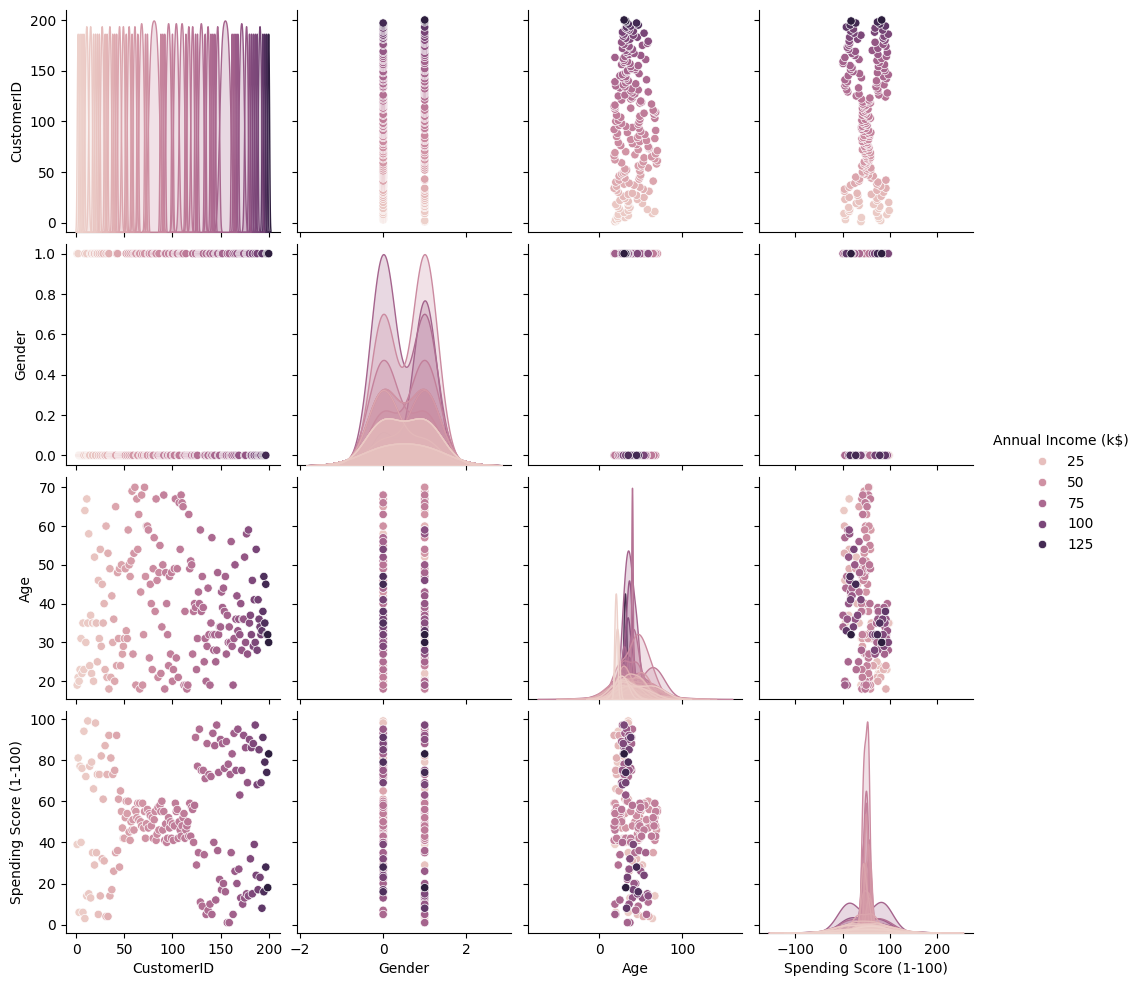

In [15]:
sns.pairplot(df,hue='Annual Income (k$)')
plt.show()

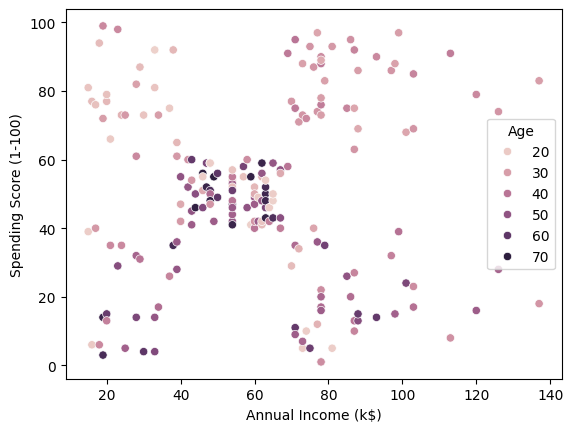

In [16]:
sns.scatterplot(x = 'Annual Income (k$)', y = 'Spending Score (1-100)', data = df,hue='Age')
plt.show()

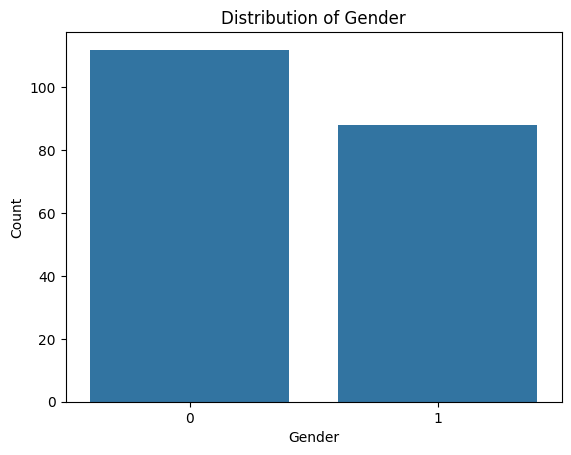

In [17]:
gender_count = df['Gender'].value_counts()
sns.barplot(x=gender_count.index,y=gender_count.values)
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Distribution of Gender')
plt.show()

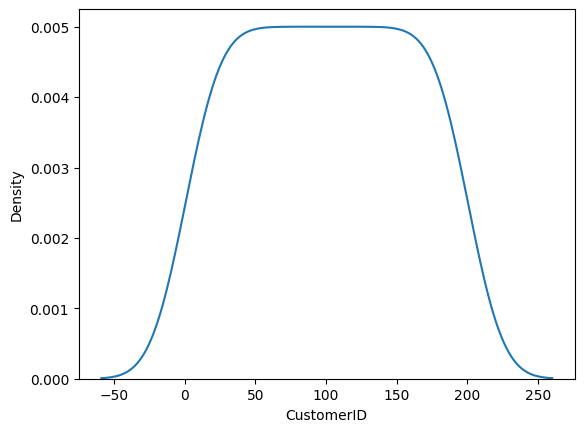

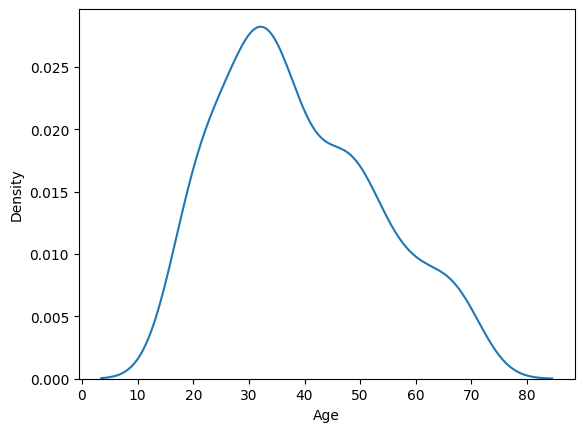

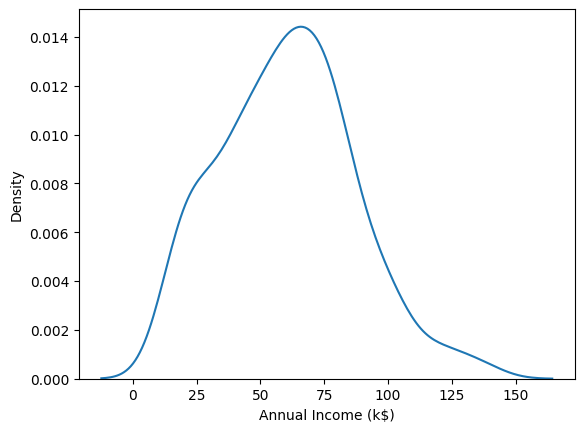

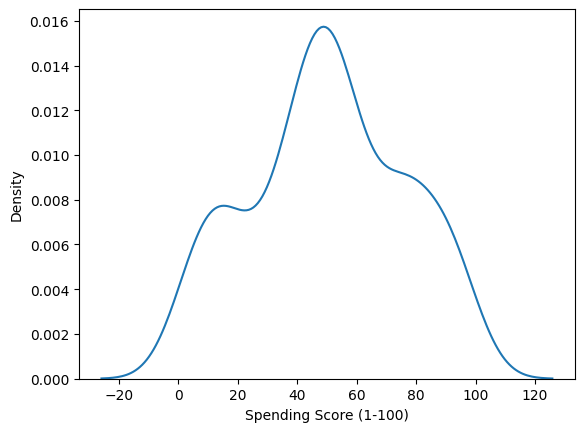

In [18]:
cols=['CustomerID', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)']
for x in cols:
    plt.figure()
    sns.kdeplot(df[x])
    plt.show()

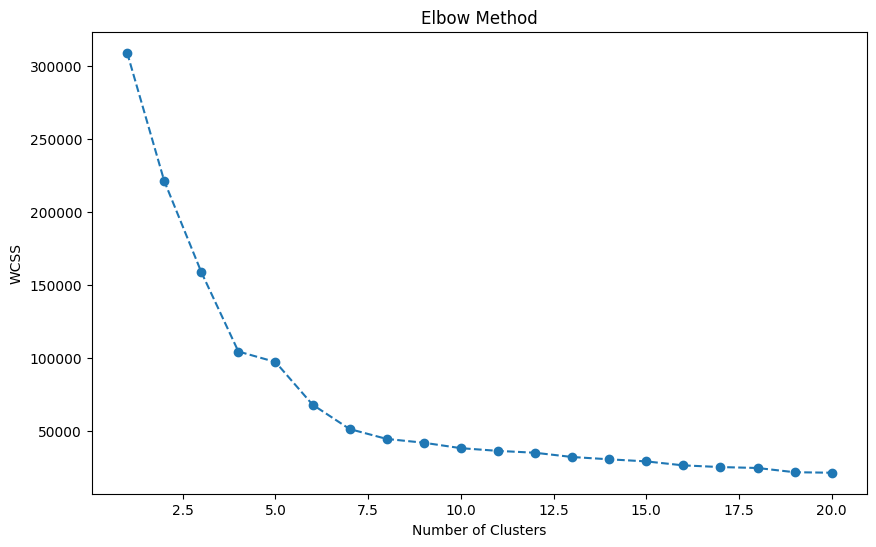

In [24]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Selecting the number of clusters using the Elbow Method
wcss = []
for i in range(1, 21):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(df.iloc[:, 2:])
    wcss.append(kmeans.inertia_)

# Plotting the Elbow Method graph
plt.figure(figsize=(10, 6))
plt.plot(range(1, 21), wcss, marker='o', linestyle='--')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

In [25]:
kmeans = KMeans(n_clusters = 5, init = 'k-means++', random_state = 42)
kmeans.fit(df.iloc[:, 2:])

KMeans(n_clusters=5, random_state=42)

In [26]:
df['Cluster'] = kmeans.labels_

cluster_summary = df.groupby('Cluster').mean()
print(cluster_summary)

         CustomerID    Gender        Age  Annual Income (k$)  \
Cluster                                                        
0         69.422222  0.377778  45.933333           47.788889   
1        190.000000  0.454545  32.454545          108.181818   
2         28.642857  0.500000  24.821429           28.714286   
3        162.000000  0.526316  40.394737           87.000000   
4        145.575758  0.454545  31.787879           76.090909   

         Spending Score (1-100)  income cluster  
Cluster                                          
0                     41.966667        2.100000  
1                     82.727273        1.090909  
2                     74.250000        0.428571  
3                     18.631579        1.736842  
4                     77.757576        2.090909  


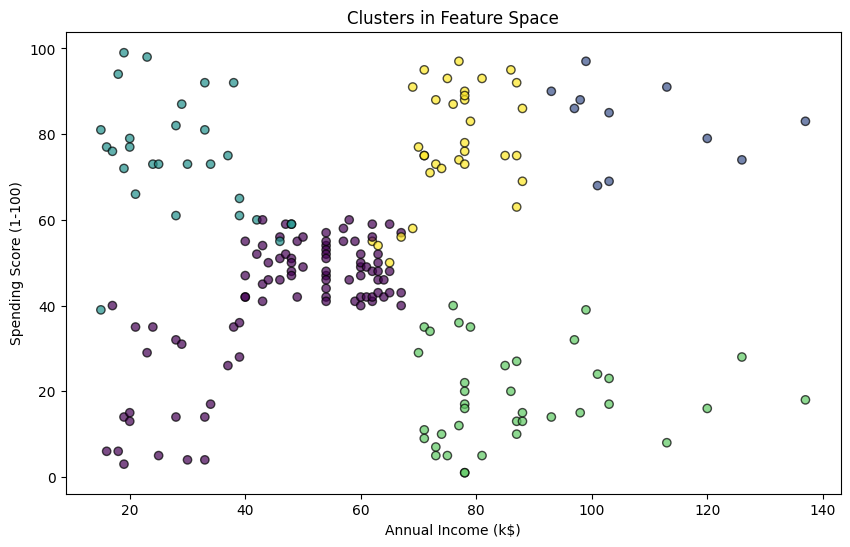

In [27]:
plt.figure(figsize=(10, 6))
plt.scatter(df['Annual Income (k$)'], df['Spending Score (1-100)'], c=df['Cluster'], cmap='viridis', edgecolors='k', alpha=0.7)
plt.title('Clusters in Feature Space')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.show()

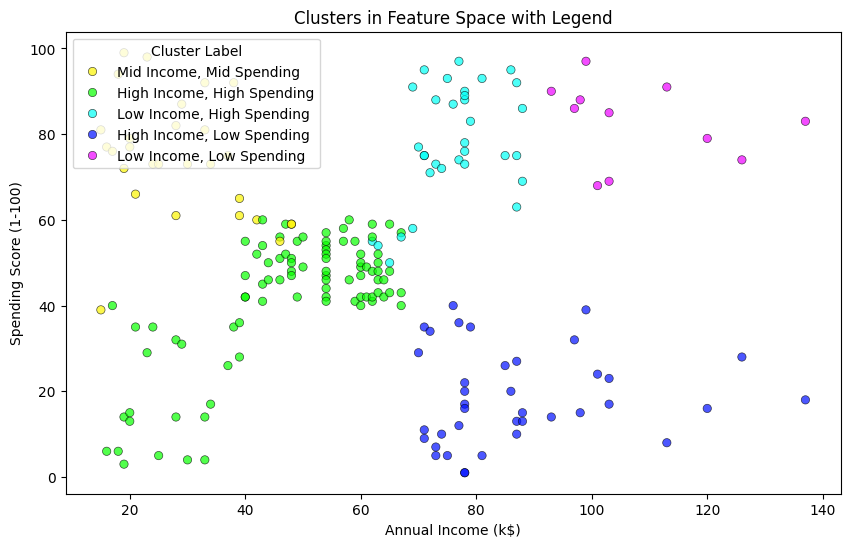

In [28]:
cluster_labels = {
    0: 'High Income, High Spending',
    1: 'Low Income, Low Spending',
    2: 'Mid Income, Mid Spending',
    3: 'High Income, Low Spending',
    4: 'Low Income, High Spending'
}

# Assign labels to clusters
df['Cluster Label'] = df['Cluster'].map(cluster_labels)
# Define a custom color palette with distinctly different colors
custom_palette = sns.color_palette('hsv', n_colors=len(df['Cluster Label'].unique()))

# Plot clusters in 2D feature space with legend using the custom palette
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Annual Income (k$)', y='Spending Score (1-100)', hue='Cluster Label', palette=custom_palette, edgecolor='k', alpha=0.7)
plt.title('Clusters in Feature Space with Legend')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend(title='Cluster Label', loc='upper left')
plt.show()